# Environment Setup
## City Overview
Simulate a virtual city with a population of 500,000. The city is divided into 12 administration districts, each containing a number of sub-regions (cells). These sub-regions are randomly assigned as work locations, education facilities, social places, and residential areas.

## City Structure
* Total Cells: 1,000,000.
* Total Population: 500,000.
* Number of Administrative Districts: 12

## Location Distribution
Within the 1,000,000 cells, the distribution of different types of locations:
* Work Locations: Some cells will be randomly designated as work locations.
* Education Facilities: Some cells will be randomly designated as schools.
* Social Places: Additional cells will be randomly designated as social places, such as parks, cafes, shopping malls, etc.
* Residential Areas: The remaining cells will be designated as residential areas.

## Daily Time Point
The simulation will include three key time points each dat:
* Morning: Agents travel to work, school, or other daily activities
* Evening: Agents return home or visit social places
* Night: Agents stay at home resting

In [18]:
import pandas as pd
import numpy as np
import random
from collections import defaultdict
import matplotlib.pyplot as plt
from mesa import Agent, Model
from mesa.space import NetworkGrid
from mesa.time import RandomActivation

import networkx as nx
from datetime import datetime, timedelta
from mesa.datacollection import DataCollector

# Virus Description
The spread of the virus within the simulation is defined by several parameters, such as:
* Transmission Rate
* Latency Period
* Infection Duration: Recovery Rate, Death Rate
* ......

# Agent Description
## Agent Attributes
Each agent in the simulation will have the following attributes:

### 1. Age:
* Represents the age of the agent, affecting their behavior, occupation and risk of severe disease.

### 2. Occupation:
Defines the agents's primary daily activity and location. Occupations include student, worker, retiree, etc.

### 3. Health Status (SEIRD):
* Susceptible (S): The agent is healthy but can become infected
* Exposed (E): The agent has been exposed to the virus, but it is not yet infectious
* Infected (I): The agent is infected and can spread the virus
* Recovered (R): The agent has recovered from the infection and is immune
* Deceased (D): The agent has died from the infection.

### 4. Mask Wearing Status:
* Whether the agent is currently wearing a mask (yes/no)

### 5. Compilance Level with Lockdown Policies:
* Measures how strictly the agent follows lockdown and social distancing guidelines (as probabilities)

## Memory
Agents have the capability to remeber certain types of information:
* Health Status Changes:
  Agents can remeber their past health status, that interferes their choices for making traveling decisions, mask-wearing and compilance with lockdown policies
* Social Interactions:  
  Agents can record their social interactions, close contacts may lead to infection
* Environmental Information:
  Agents can retain information about the environment, such as the severity of outbreaks in specific areas, helping them make decisions about their movements and interacitons.

## Learning
Agents can adapt their behavior based on past experience and acquired knowledge:
* Behavioral Adjustment:
* Risk Adjustment:

## Agent Behavior Descriptions
### 1. Daily Activities:
    Agents follow a daily routine that involves going to work, school, or engaging in social activities. These routine vary depending on the agent's occupation and age group. The nature of activities change throughout different times of the day, include morning, evening and night.

### 2. Social Interactions:
    Agents engage in face-to-face interactions with other agents throughout the day. These interactions occur at work, school, social places and within residential areas.

### 3. Mask-Wearing Behavior:
    Agents decide whether to wear masks based on their health status, perceived risk, and compliance level.

### 4. Lockdown Policies:
    Agents' behavior is influenced by lockdown policies in place, such as movement restrictions and lockdowns.

## SIERD Model
* Susceptible: These agents have not yet been infected with the virus but are at risk of becoming infected  
* Exposed: These agents have been exposed to the virus and are infected, but are not yet infectious to others  
* Infected: These agents are currently infected and are capable of transmitting the virus to susceptible individuals    
* Recovered: These agents have recovered from the infection and are typically assumed to have immunity    
* Dead: These agents have died as a result of the infection

## Rules
### 1. Infection Spread Rules:
* When an infected agent comes into contact with a susceptible agent, there is a probability of virus transmission
* The probability of transmission may increase when a susceptible agent comes into contact with multiple infected agents
### 2. Social Interaction Rules:
* Agents’ social behavior may be influenced by their infection status and the surrounding environment. For example, during outbreaks, agents may be  more inclined to avoid crowded areas or maintain social distancing.
### 3. Government Intervention Rules:
* Government may implement control measures such as lockdowns, mask-wearing policies travel to slow down virus spread.

# Government Policies
* No Interventions
* Lockdown Only
* Mask Policy Only
* Combination of Lockdown and Mask Policy

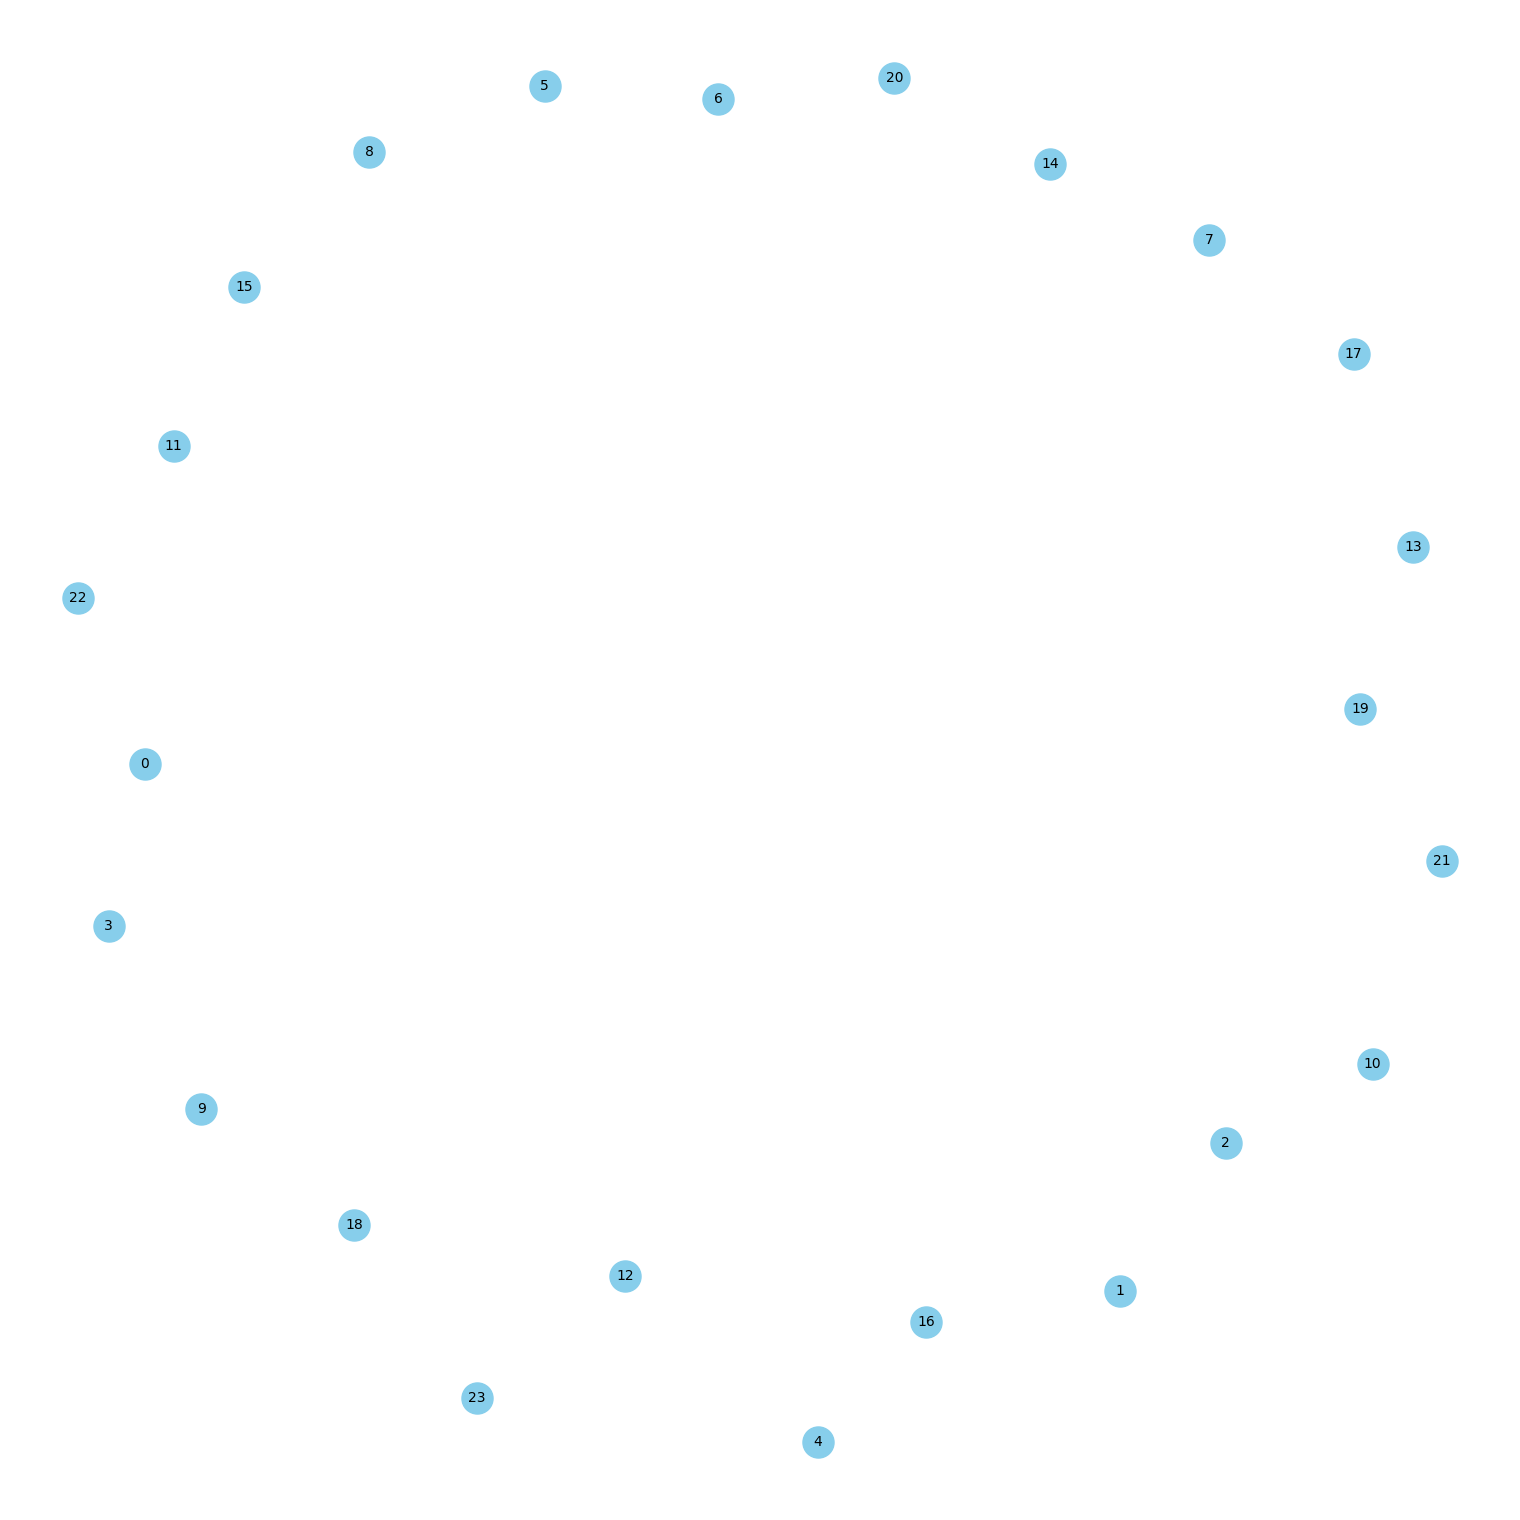

In [25]:
import random
import matplotlib.pyplot as plt
import networkx as nx
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import NetworkGrid

class CityAgent(Agent):
    def __init__(self, unique_id, model, residence, work):
        super().__init__(unique_id, model)
        self.residence = residence
        self.work = work
        self.location = residence

    def move_to_work(self):
        self.location = self.work

    def move_to_residence(self):
        self.location = self.residence

    def step(self):
        # Assume the day has two time periods: morning and afternoon
        if self.model.time_of_day == "morning":
            self.move_to_work()
        elif self.model.time_of_day == "afternoon":
            self.move_to_residence()

class CityModel(Model):
    def __init__(self, num_agents, num_districts):
        self.num_agents = num_agents
        self.num_districts = num_districts
        self.schedule = RandomActivation(self)
        self.grid = NetworkGrid(nx.Graph())
        self.time_of_day = "morning"
        
        self.districts = self.create_districts()
        self.add_nodes_to_grid()

        # Create agents
        for i in range(self.num_agents):
            residence = random.choice(list(self.districts.keys()))
            work = random.choice(list(self.districts.keys()))
            agent = CityAgent(i, self, residence, work)
            self.schedule.add(agent)
            agent_node = self.grid.G.nodes[residence]
            agent_node["agent"] = agent  # Set the agent attribute for the node

    def create_districts(self):
        districts = {}
        for i in range(self.num_districts):
            residence_area = i * 2  # ensure unique IDs
            work_area = i * 2 + 1   # ensure unique IDs
            districts[residence_area] = {"type": "residence", "agents": []}
            districts[work_area] = {"type": "work", "agents": []}
        return districts

    def add_nodes_to_grid(self):
        for district in self.districts:
            self.grid.G.add_node(district)

    def step(self):
        self.schedule.step()
        self.time_of_day = "afternoon" if self.time_of_day == "morning" else "morning"

# 設定模型參數
num_agents = 100
num_districts = 12

# 初始化模型
model = CityModel(num_agents, num_districts)

# 模擬步驟
for i in range(10):
    model.step()

# 可視化
def plot_agents(model):
    pos = nx.spring_layout(model.grid.G)  # use spring layout for better visualization
    plt.figure(figsize=(15, 15))
    nx.draw(model.grid.G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=10, font_color="black")

    for agent in model.schedule.agents:
        x, y = pos[agent.location]
        plt.scatter(x, y, c="red" if agent.location == agent.work else "green", s=100)

    plt.show()

plot_agents(model)


## Setup environment
small demo

Step 1
Morning:
Agent 0 is at (7, 0)
Agent 1 is at (7, 1)
Agent 2 is at (3, 3)
Agent 3 is at (1, 4)
Agent 4 is at (6, 2)
Agent 5 is at (4, 1)
Agent 6 is at (5, 5)
Agent 7 is at (7, 1)
Agent 8 is at (5, 4)
Agent 9 is at (4, 1)
Agent 10 is at (0, 6)
Agent 11 is at (4, 7)
Agent 12 is at (6, 2)
Agent 13 is at (1, 1)
Agent 14 is at (1, 5)


Step 2
Afternoon:
Agent 0 is at (6, 6)
Agent 1 is at (3, 1)
Agent 2 is at (7, 4)
Agent 3 is at (7, 5)
Agent 4 is at (6, 5)
Agent 5 is at (5, 5)
Agent 6 is at (1, 5)
Agent 7 is at (4, 5)
Agent 8 is at (2, 5)
Agent 9 is at (6, 4)
Agent 10 is at (3, 6)
Agent 11 is at (0, 6)
Agent 12 is at (1, 5)
Agent 13 is at (6, 5)
Agent 14 is at (2, 2)


Step 3
Morning:
Agent 0 is at (7, 0)
Agent 1 is at (7, 1)
Agent 2 is at (3, 3)
Agent 3 is at (1, 4)
Agent 4 is at (6, 2)
Agent 5 is at (4, 1)
Agent 6 is at (5, 5)
Agent 7 is at (7, 1)
Agent 8 is at (5, 4)
Agent 9 is at (4, 1)
Agent 10 is at (0, 6)
Agent 11 is at (4, 7)
Agent 12 is at (6, 2)
Agent 13 is at (1, 1)
Agent 14

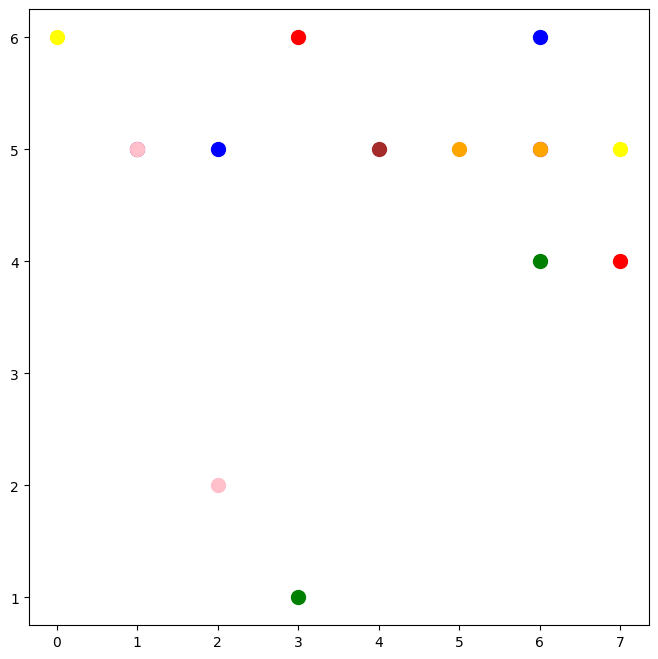

In [15]:
import random
import matplotlib.pyplot as plt
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid

class CityAgent(Agent):
    def __init__(self, unique_id, model, residence_area, work_area):
        super().__init__(unique_id, model)
        self.unique_id = unique_id
        self.residence_area = residence_area
        self.work_area = work_area
        self.location = residence_area
        self.model = model

    def move_to_work(self):
        self.model.grid.move_agent(self, self.work_area)
        self.location = self.work_area

    def move_to_residence(self):
        self.model.grid.move_agent(self, self.residence_area)
        self.location = self.residence_area

    def step(self):
        if self.model.time_of_day == "morning":
            self.move_to_work()
        elif self.model.time_of_day == "afternoon":
            self.move_to_residence()

class CityModel(Model):
    def __init__(self, num_agents, width, height):
        self.num_agents = num_agents
        self.schedule = RandomActivation(self)
        self.grid = MultiGrid(width, height, False)
        self.time_of_day = "morning"
        
        # Create agents
        for i in range(self.num_agents):
            residence_area = (random.randint(0, width - 1), random.randint(0, height - 1))
            work_area = (random.randint(0, width - 1), random.randint(0, height - 1))
            agent = CityAgent(i, self, residence_area, work_area)
            self.schedule.add(agent)
            self.grid.place_agent(agent, residence_area)

    def step(self):
        self.schedule.step()
        self.time_of_day = "afternoon" if self.time_of_day == "morning" else "morning"

# Set up the model
num_agents = 15
width = 8
height = 8

model = CityModel(num_agents, width, height)

# Simulate for a few steps
for i in range(10):  # Simulate 10 steps
    print(f"Step {i+1}")
    if model.time_of_day == "morning":
        print("Morning:")
    else:
        print("Afternoon:")
    model.step()
    for agent in model.schedule.agents:
        print(f"Agent {agent.unique_id} is at {agent.location}")
    print("\n")

# Visualize the model
def plot_model(model):
    colors = ["blue", "green", "red", "yellow", "purple", "orange", "pink", "brown"]
    plt.figure(figsize=(8, 8))
    for cell in model.grid.coord_iter():
        content, (x, y) = cell
        for agent in content:
            plt.scatter(x, y, color=colors[agent.unique_id % len(colors)], s=100)  # Adjust color based on unique_id
    plt.show()

plot_model(model)

### Define CityAgent
* unique_id: A unique identifier for each agent.
* residence_area: The area where the agent resides.
* work_area: The area where the agent works.

#### Agent movement rules:

* If the agent is not in a lockdown area, they can travel to their workplace in the morning and return home in the afternoon.
* If the agent's residence area is in lockdown, they cannot move.
* If the agent's workplace is in lockdown, they stay at home.

#### Daily routine:

* Every morning, agents travel to their workplace.
* Every afternoon, agents return home.

In [30]:
class CityAgent(Agent):
    def __init__(self, unique_id, model, residence_area, work_area, district):
        super().__init__(unique_id, model)
        self.unique_id = unique_id
        self.residence_area = residence_area
        self.work_area = work_area
        self.district = district
        self.location = residence_area
        self.model = model

    def move_to_work(self):
        if not self.model.is_lockdown(self.work_area):
            self.model.grid.move_agent(self, self.work_area)
            self.location = self.work_area

    def move_to_residence(self):
        if not self.model.is_lockdown(self.residence_area):
            self.model.grid.move_agent(self, self.residence_area)
            self.location = self.residence_area

    def step(self):
        if self.model.time_of_day == "morning":
            self.move_to_work()
        elif self.model.time_of_day == "afternoon":
            self.move_to_residence()


### Define City
1. A model representing a city with agents that have a residence area and a work area.
2. Agents can move between these areas based on the time of day and lockdown status of districts.


In [57]:
class CityModel(Model):
    ''' 
        Attributes:
        -----------
        num_agents : int
            The number of agents in the model.
        schedule : mesa.time.RandomActivation
            The scheduler to manage agent activation.
        grid : mesa.space.MultiGrid
            The grid representing the city space.
        time_of_day : str
            Represents the current time of day ('morning' or 'afternoon').
        lockdown_areas : set
            A set of district IDs that are under lockdown.
        lockdown_coordinates : dict
            A dictionary mapping district IDs to their coordinates that are under lockdown.
        districts : dict
            A dictionary mapping grid coordinates to district IDs
        
        Methods:
        --------
        __init__(self, num_agents, width, height, num_districts):
            Initializes the CityModel with the given number of agents, grid size, and number of districts.
        create_districts(self, num_districts, width, height):
            Creates districts by dividing the grid into specified number of districts and returns a dictionary mapping coordinates to district IDs.
        is_lockdown(self, area):
            Checks if the given area (grid coordinate) is in a lockdown district.
        set_lockdown(self, district_id):
            Sets a district to be in lockdown and stores its coordinates.
        lift_lockdown(self, district_id):
            Lifts the lockdown for a district and removes its coordinates from the lockdown dictionary.
        print_lockdown_areas(self):
            Prints the coordinates of all districts that are currently under lockdown.
        print_districts(self):
            Prints the coordinates of all districts in the model.
        step(self):
            Advances the model by one step, switching between 'morning' and 'afternoon'.
    
     '''
    
    def __init__(self, num_agents, width, height, num_districts):
        """
        Initializes the CityModel with the given number of agents, grid size, and number of districts.

        Parameters:
        -----------
        num_agents : int
            The number of agents in the model.
        width : int
            The width of the grid.
        height : int
            The height of the grid.
        num_districts : int
            The number of districts in the city.
        """     
     
        self.num_agents = num_agents
        self.schedule = RandomActivation(self)
        self.grid = MultiGrid(width, height, False)
        self.time_of_day = "morning"
        self.lockdown_areas = set()
        self.lockdown_coordinates = {}

        self.districts = self.create_districts(num_districts, width, height)
        
        # Create agents in the environment 
        for i in range(self.num_agents):
            residence_area = (random.randint(0, width - 1), random.randint(0, height - 1))
            work_area = (random.randint(0, width - 1), random.randint(0, height - 1))
            # all agents start at residence area
            district = self.districts[residence_area]
            agent = CityAgent(i, self, residence_area, work_area, district)
            self.schedule.add(agent)
            self.grid.place_agent(agent, residence_area)
        
        # Record the agents' district movements
        self.agent_movements = {i: [] for i in range(self.num_agents)}

    def create_districts(self, num_districts, width, height):
        """
        Creates districts by dividing the grid into specified number of districts.

        Parameters:
        -----------
        num_districts : int
            The number of districts in the city.
        width : int
            The width of the grid.
        height : int
            The height of the grid.

        Returns:
        --------
        dict
            A dictionary mapping coordinates to district IDs.
        """
        districts = {}
        num_cells = width * height
        cells_per_district = num_cells // num_districts
        district_id = 0
        for x in range(width):
            for y in range(height):
                if len([v for v in districts.values() if v == district_id]) >= cells_per_district:
                    district_id += 1
                if district_id >= num_districts:
                    district_id = num_districts - 1
                districts[(x, y)] = district_id
        return districts

    def is_lockdown(self, area):
        # Checks if the given area is in a lockdown area
        return self.districts.get(area) in self.lockdown_areas

    def set_lockdown(self, district_id):
        # Assign a district to be in lockdown and store its coordinates
        self.lockdown_areas.add(district_id)
        self.lockdown_coordinates[district_id] = [coord for coord, dist in self.districts.items() if dist == district_id]

    def lift_lockdown(self, district_id):
        # Lift the lockdown for a district and removes its coordinates from the lockdown disctionary
        self.lockdown_areas.discard(district_id)
        if district_id in self.lockdown_coordinates:
            del self.lockdown_coordinates[district_id]

    def print_lockdown_areas(self):
        # Print the coordinates of all the districts that are under lockdown
        for district_id, coords in self.lockdown_coordinates.items():
            print(f"Lockdown District {district_id}: {coords}")

    def print_districts(self):
        # Print all the coordinates of all districts in the model
        district_coords = {}
        for coord, district_id in self.districts.items():
            if district_id not in district_coords:
                district_coords[district_id] = []
            district_coords[district_id].append(coord)
        
        for district_id, coords in district_coords.items():
            print(f"District {district_id}: {coords}")

    def step(self):
        # Advance the model by one step, switching between "morning" and "afternoon"
        self.schedule.step()
        self.time_of_day = "afternoon" if self.time_of_day == "morning" else "morning"

### Test Here!
try different
* num_agents : number of agents
* width: width of the environment
* height: height of the environment
* num_districts: number of districts in the environment

In [56]:
# Set up the model
num_agents = 15
width = 8
height = 8
num_districts = 10

model = CityModel(num_agents, width, height, num_districts)

In [58]:
# Example of setting lockdown on a district
model.set_lockdown(5)  # Lockdown the (X) district

# Print lockdown districts
model.print_lockdown_areas()

# Print all districts and their coordinates
model.print_districts()

Lockdown District 5: [(3, 6), (3, 7), (4, 0), (4, 1), (4, 2), (4, 3)]
District 0: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
District 1: [(0, 6), (0, 7), (1, 0), (1, 1), (1, 2), (1, 3)]
District 2: [(1, 4), (1, 5), (1, 6), (1, 7), (2, 0), (2, 1)]
District 3: [(2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7)]
District 4: [(3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5)]
District 5: [(3, 6), (3, 7), (4, 0), (4, 1), (4, 2), (4, 3)]
District 6: [(4, 4), (4, 5), (4, 6), (4, 7), (5, 0), (5, 1)]
District 7: [(5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7)]
District 8: [(6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5)]
District 9: [(6, 6), (6, 7), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7)]


Step 1
Morning:
Agent 0 is at (4, 4) in district 1
Agent 1 is at (7, 7) in district 4
Agent 2 is at (4, 7) in district 6
Agent 3 is at (4, 4) in district 9
Agent 4 is at (5, 6) in district 9
Agent 5 is at (2, 3) in district 3
Agent 6 is at (7, 0) in district 0
Agent 7 is at (4, 4) in district 9
Agent 8 is at (5, 1) in district 6
Agent 9 is at (7, 1) in district 7
Agent 10 is at (7, 0) in district 3
Agent 11 is at (0, 4) in district 2
Agent 12 is at (6, 7) in district 1
Agent 13 is at (3, 4) in district 9
Agent 14 is at (2, 0) in district 3


Step 2
Afternoon:
Agent 0 is at (0, 6) in district 1
Agent 1 is at (3, 1) in district 4
Agent 2 is at (4, 7) in district 6
Agent 3 is at (7, 7) in district 9
Agent 4 is at (7, 6) in district 9
Agent 5 is at (2, 7) in district 3
Agent 6 is at (0, 3) in district 0
Agent 7 is at (7, 1) in district 9
Agent 8 is at (5, 1) in district 6
Agent 9 is at (5, 5) in district 7
Agent 10 is at (2, 3) in district 3
Agent 11 is at (1, 5) in district 2
Agent 12 is 

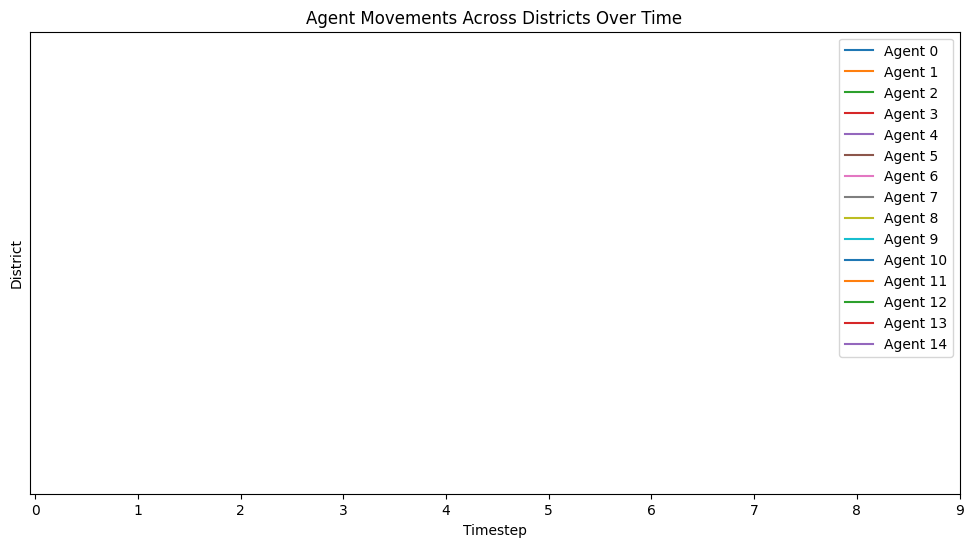

In [61]:
# Simulate for a few steps
num_steps = 10
for i in range(num_steps):  # Simulate 10 steps
    print(f"Step {i+1}")
    if model.time_of_day == "morning":
        print("Morning:")
    else:
        print("Afternoon:")
    model.step()
    for agent in model.schedule.agents:
        print(f"Agent {agent.unique_id} is at {agent.location} in district {agent.district}")
    print("\n")

# Visualize the model
def plot_agent_movements(model):
    plt.figure(figsize=(12, 6))
    for agent_id, movements in model.agent_movements.items():
        plt.plot(range(len(movements)), movements, label=f"Agent {agent_id}")
    plt.xlabel("Timestep")
    plt.xticks(range(num_steps))  # Ensure all timesteps are shown
    plt.ylabel("District")
    plt.yticks(sorted(set(sum(model.agent_movements.values(), []))))  # Ensure all districts are shown
    plt.title("Agent Movements Across Districts Over Time")
    plt.legend()
    plt.show()

plot_agent_movements(model)